In [1]:
# EGRIP Surface Transect isotopes 2018

import pandas as pd # for data handling
import numpy as np # for mathematical operations
import datetime as dt # for working with dates
%matplotlib inline
import matplotlib.pyplot as plt # for plotting
from loadandconvert import exportdf,deltatogas,removeoutliers,lscatter, plot1
pd.set_option('display.max_columns', 20)

In [7]:
# import data
weather=pd.read_csv('/Users/swa048/forServer/Meteo/Ambient/2018/EGRIP/Weather_info_EGRIP18.csv',index_col=(0),parse_dates=True,infer_datetime_format=True,na_values=['Nan'],skiprows=[0],usecols=np.arange(9)) #

# import ST samples
dfST_05=pd.read_csv('/Users/swa048/forServer/Snow/Isotopes/2018/data_measuredsamples/ST/ST_05cm.txt',index_col=0,parse_dates=True,na_values=['NAN'],delim_whitespace=True)
dfST_1=pd.read_csv('/Users/swa048/forServer/Snow/Isotopes/2018/data_measuredsamples/ST/ST_1cm.txt',index_col=0,parse_dates=True,na_values=['NAN'],delim_whitespace=True)
dfST_2=pd.read_csv('/Users/swa048/forServer/Snow/Isotopes/2018/data_measuredsamples/ST/ST_2cm.txt',index_col=0,parse_dates=True,na_values=['NAN'],delim_whitespace=True)


dfPRECIP=pd.read_csv('/Users/swa048/forServer/Snow/Isotopes/2018/data_measuredsamples/PRECIP/PRECIP_sorted.txt',index_col=0,parse_dates=True,na_values=['NAN'],delim_whitespace=True)



# import vapor 05 data
#iso7m=pd.read_csv('/Users/swa048/forServer/Vapour/2018/processed_data_combined/EG18_level7m.txt',index_col=0,parse_dates=True,na_values=['NAN'])  #7m?
iso30=pd.read_csv('/Users/swa048/forServer/Vapour/2018/processed_data_combined/EG18_level30cm.txt',index_col=0,parse_dates=True,na_values=['NAN'])  
#iso80=pd.read_csv('/Users/swa048/forServer/Vapour/2018/processed_data_combined/EG18_level80cm.txt',index_col=0,parse_dates=True,na_values=['NAN'])
iso180=pd.read_csv('/Users/swa048/forServer/Vapour/2018/processed_data_combined/EG18_level180cm.txt',index_col=0,parse_dates=True,na_values=['NAN'])
df03m_d=iso30.resample('1D').mean()
df2m_d=iso180.resample('1D').mean()


In [39]:
weather.Snowfall.dtype

dtype('float64')

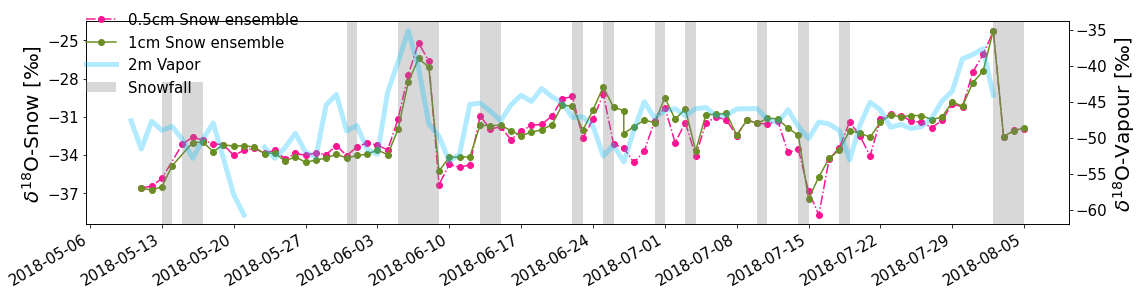

In [38]:
# plot the ST 2018 data

import matplotlib.dates as mdates

weekloc = mdates.WeekdayLocator(byweekday=mdates.SU, interval=1)
fig,ax,axi=plot1(figsize=(16,4))

axi.plot(df2m_d.d18O,color='deepskyblue',label='2m Vapor',linewidth=5,alpha=0.3)
axi.set_yticks(np.arange(-60,-30,5))
ax.plot(dfST_05.d18O,Marker='o',color='deeppink',LineStyle='-.',label='0.5cm Snow ensemble')
ax.plot(dfST_1.d18O,Marker='o',color='olivedrab',label='1cm Snow ensemble')
#ax.plot(dfST_2.d18O,Marker='o',color='limegreen',label='2cm Snow ensemble')
ax.set_yticks(np.arange(-37,-22,3))

#ax.plot(dfPRECIP.d18O,marker=u'$\u2744$',color='blue',label='fresh Snow',MarkerSize=12,LineStyle='',alpha=0.5) # 22a2


for day in weather[weather.Snowfall==1].index:
    print
    #ax.axvline(x=day,color='lightgrey',alpha=1,LineWidth=2)
    if day==pd.to_datetime('2018-08-02'):
        axi.axvspan(day,day+dt.timedelta(days=1),color='grey',alpha=0.3,lw=0,label='Snowfall')
    elif (day==pd.to_datetime('2018-05-13'))|(day==pd.to_datetime('2018-05-15'))|(day==pd.to_datetime('2018-05-16')):
        axi.axvspan(day,day+dt.timedelta(days=1),ymax=0.7,color='grey',alpha=0.3,lw=0)
    else:
        axi.axvspan(day,day+dt.timedelta(days=1),color='grey',alpha=0.3,lw=0)
#ax.axvspan(pd.to_datetime('2019-05-28'),pd.to_datetime('2019-06-03'),color='lightseagreen',alpha=0.4)
#ax.axvspan(pd.to_datetime('2019-06-21'),pd.to_datetime('2019-06-25'),color='lightseagreen',alpha=0.4)
#ax.axvspan(pd.to_datetime('2019-07-15'),pd.to_datetime('2019-07-21'),color='lightseagreen',alpha=0.4)


#ax.set_title(u'EGRIP18 ST $\delta^{18}$O',fontsize=20)
#fig.legend(fontsize=15,loc='upper center')
#fig.legend(fontsize=15,bbox_to_anchor=(1,0), loc="upper left",  bbox_transform=fig.transFigure)
#fig.legend(fontsize=15,bbox_to_anchor=[0.7, 0.26], loc='center',  bbox_transform=fig.transFigure)
fig.legend(fontsize=15,bbox_to_anchor=[0.17, 0.85], loc='center',  bbox_transform=fig.transFigure,frameon=False)#facecolor='white',framealpha=1)
#leg.get_frame().set_linewidth(0.0)

ax.xaxis.set_major_locator(weekloc)
ax.set_ylabel('$\delta^{18}$O-Snow [‰] ',fontsize=20)
axi.set_ylabel('$\delta^{18}$O-Vapour [‰] ',fontsize=20)
fig.autofmt_xdate()
fig.tight_layout()
#fig.savefig('/Users/swa048/forServer/Snow/Isotopes/2018/plots/ST2018.png',dpi=300)
fig.savefig('/Users/swa048/Documents/papersSW/Paper2/figures/ST2018_1cm.png',dpi=150)

In [44]:
day

Timestamp('2018-08-04 00:00:00')